In [47]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_openml
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from scipy.linalg import eigh # get eigen values & eigen vectors

In [4]:
mnist = fetch_openml('mnist_784',version=1,as_frame=False)

In [5]:
mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [9]:
mnist_df = pd.DataFrame(data=mnist.data,columns=mnist.feature_names)
mnist_df['label'] = mnist.target
mnist_df.head()

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784,label
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9


In [11]:
mnist_df.shape

(70000, 785)

* Data has 784 features independent variables as it's refer to pictures pixels data suppose is 28*28 feature per one datapoint 
* data has one dependent variable 'label'

### Define features independent variables & label dependent variables

In [12]:
# extract label 
label = mnist_df['label']
label.head()

0    5
1    0
2    4
3    1
4    9
Name: label, dtype: object

In [13]:
# extract features
d = mnist_df.drop('label',axis=1)
d.head()

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [15]:
print(f'features shape: {d.shape},\nlabel shape: {label.shape}')

features shape: (70000, 784),
label shape: (70000,)


* each data point represent a number pictures & the data had ben flattened so to represent a one picture for a one datapoint we need to represnt the it as matrix 28px * 28px, so will reshape it into a matrix  

In [16]:
plt.figure(figsize=(7,7))
idx = 100
grid_data = d.iloc[100].to_numpy().reshape(28,28) # reshape the one data point to it's original matrix 28*28 from 1D to 2D
grid_data

array([[  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0

<Figure size 504x504 with 0 Axes>

### show the data point for idx 100

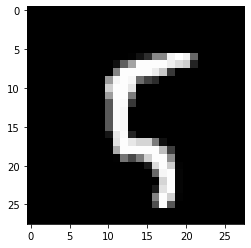

label is:5


In [18]:
plt.imshow(grid_data,interpolation=None,cmap='gray')
plt.show()
print(f'label is:{label[idx]}')

### create a function to plot any idx 

In [23]:
def show_digit(idx):
    plt.figure(figsize=(7,7))
    data_grid = d.iloc[idx].to_numpy().reshape(28,28)
    plt.imshow(data_grid,interpolation=None,cmap='gray')
    plt.show()
    print(f'data label is:{label[idx]}')

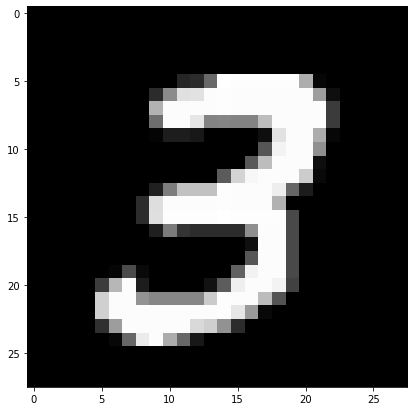

data label is:3


In [24]:
show_digit(7)

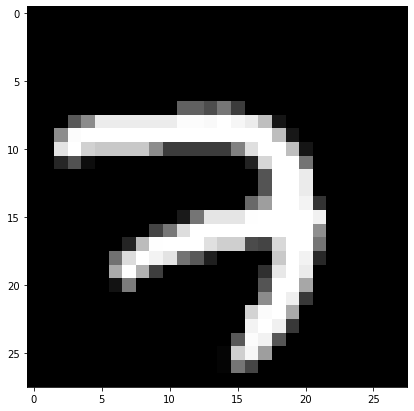

data label is:7


In [26]:
show_digit(5000)

# PCA by coding following PCA Process
* Standardization 
* Covariance Matrix
* eigen values & coresponding eigen vectors
* Projection on eigen vectors 'on the plane'
### 1- Standardization

In [28]:
scaler = StandardScaler()

In [30]:
scaled_d = scaler.fit_transform(d)
scaled_d.shape

(70000, 784)

### 2- Covariance Matrix
S = A^T * A
* use matrix multiply from numpy

In [31]:
data = scaled_d.copy()
covariance_matrix = np.matmul(data.T,data) # np.matrix multiplication
print(f'covariance_matrix shape: {covariance_matrix.shape}')

covariance_matrix shape: (784, 784)


In [32]:
covariance_matrix

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

### 3- Eigen values & coresponding Eigen vectors

## Projection in 2D
* will use function from scipy.linalg it return the eigen values & eigen vectors in Ascending Order , so to get the max eigen values should pass the last dimension in matrix taking in consideration that it start from index 0

In [35]:
print(f'covariance_matrix shape: {covariance_matrix.shape}')

covariance_matrix shape: (784, 784)


In [36]:
# rteurn the top 2 eigen values & coresponsing eigen vectors
eigen_values , eigen_vectors = eigh(covariance_matrix,eigvals=(782,783))

In [37]:
eigen_values

array([2033948.98347217, 2839980.42368863])

In [38]:
eigen_vectors

array([[0., 0.],
       [0., 0.],
       [0., 0.],
       ...,
       [0., 0.],
       [0., 0.],
       [0., 0.]])

In [39]:
print(eigen_vectors.shape)

(784, 2)


In [41]:
# Transopse eigen vectors
vectors = eigen_vectors.T
print(vectors.shape)

(2, 784)


### 4- Project the original data on the plane 'on the eigen vectors'
Xi = Xi^T * eigen vectors

In [42]:
data.shape

(70000, 784)

In [43]:
new_coordinates = np.matmul(vectors,data.T)
print(f'new data point shape= {vectors.shape} * {data.T.shape} is {new_coordinates.shape}')

new data point shape= (2, 784) * (784, 70000) is (2, 70000)


## Appending label on the 2D Projected data

In [44]:
label.shape

(70000,)

In [45]:
new_coordinates = np.vstack((new_coordinates,label)).T
new_coordinates.shape

(70000, 3)

## Create DataFrame for new Dataset

In [46]:
new_mnist_df = pd.DataFrame(data=new_coordinates,columns=['2pca','1pca','label'])
new_mnist_df.head()

,2pca,1pca,label
0,-4.929711,-0.89172,5
1,-7.51756,8.81353,0
2,9.824461,2.204835,4
3,-4.029669,-6.534627,1
4,3.278848,-5.251618,9


## Plot mnist on 2D

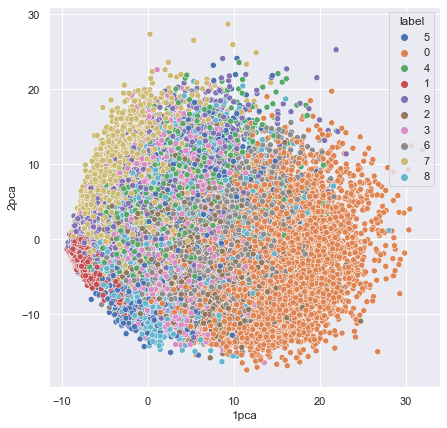

In [49]:
sns.set_theme(rc={'figure.figsize':[7,7]})
sns.scatterplot(data=new_mnist_df,x='1pca',y='2pca',hue='label')
plt.show()

# PCA Using SkLearn

In [71]:
pca = PCA(n_components=2)

In [72]:
pca_data = pca.fit_transform(data) # data was stamdardized before
print(f'pca_data shape: {pca_data.shape}')

pca_data shape: (70000, 2)


In [73]:
pca_data = np.vstack((pca_data.T,label)).T
print(f'pca_data shape: {pca_data.shape}')

pca_data shape: (70000, 3)


### explained variance ratio

In [74]:
pca.explained_variance_ratio_

array([0.05642719, 0.04041226])

## percentage of variance explained 

In [75]:
percentage_var_explained = pca.explained_variance_ / np.sum(pca.explained_variance_)
percentage_var_explained

array([0.58268806, 0.41731194])

In [76]:
var_explained_total = np.cumsum(percentage_var_explained)
var_explained_total

array([0.58268806, 1.        ])

## Create DataFrame for new Dataset

In [55]:
new_df = pd.DataFrame(data=pca_data,columns=['1pca','2pca','label'])
new_df.head()

,1pca,2pca,label
0,-0.891135,-4.928736,5
1,8.813372,-7.517994,0
2,2.204924,9.824208,4
3,-6.53484,-4.029842,1
4,-5.251932,3.278332,9


## Plot mnist on 2D

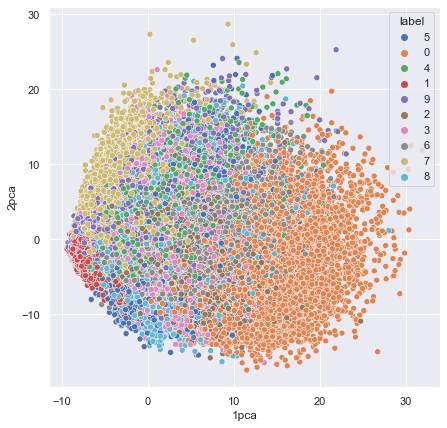

In [56]:
sns.set_theme(rc={'figure.figsize':[7,7]})
sns.scatterplot(data=new_df,x='1pca',y='2pca',hue='label')
plt.show()

* PCA in 2D Or maximum 3D is for visualization but we can use PCA For Dimensional reduction for other objective in ML

## Explained variance by PCA

In [77]:
pca = PCA(n_components=784)

In [78]:
pca_data = pca.fit_transform(data) # data standardized before
print(f'pca_data shape: {pca_data.shape}')

pca_data shape: (70000, 784)


In [79]:
per_var_explained = pca.explained_variance_ / np.sum(pca.explained_variance_)
per_var_explained

array([5.64271890e-02, 4.04122588e-02, 3.73827333e-02, 2.89299967e-02,
       2.52075176e-02, 2.19254904e-02, 1.91428200e-02, 1.74068380e-02,
       1.53223192e-02, 1.39608655e-02, 1.34217502e-02, 1.20142136e-02,
       1.11396188e-02, 1.09058166e-02, 1.02798565e-02, 9.94954818e-03,
       9.31255447e-03, 9.19634749e-03, 8.88599812e-03, 8.63195357e-03,
       8.21741429e-03, 7.98416580e-03, 7.62572887e-03, 7.42315294e-03,
       7.16569784e-03, 6.89313988e-03, 6.81399054e-03, 6.54587652e-03,
       6.27293368e-03, 6.10345345e-03, 5.97260805e-03, 5.89303875e-03,
       5.67358491e-03, 5.59357597e-03, 5.52473105e-03, 5.34443453e-03,
       5.27593434e-03, 5.15841172e-03, 5.05498061e-03, 4.77437784e-03,
       4.76312011e-03, 4.65154837e-03, 4.53454310e-03, 4.45757102e-03,
       4.42312508e-03, 4.37877290e-03, 4.37293648e-03, 4.27723692e-03,
       4.24807888e-03, 4.18523984e-03, 4.04059497e-03, 3.96258302e-03,
       3.93175520e-03, 3.90561562e-03, 3.86443636e-03, 3.77500874e-03,
      

In [80]:
cummulative_var_explained = np.cumsum(per_var_explained)
cummulative_var_explained

array([0.05642719, 0.09683945, 0.13422218, 0.16315218, 0.1883597 ,
       0.21028519, 0.22942801, 0.24683484, 0.26215716, 0.27611803,
       0.28953978, 0.30155399, 0.31269361, 0.32359943, 0.33387928,
       0.34382883, 0.35314139, 0.36233773, 0.37122373, 0.37985569,
       0.3880731 , 0.39605727, 0.403683  , 0.41110615, 0.41827185,
       0.42516499, 0.43197898, 0.43852485, 0.44479779, 0.45090124,
       0.45687385, 0.46276689, 0.46844047, 0.47403405, 0.47955878,
       0.48490321, 0.49017915, 0.49533756, 0.50039254, 0.50516692,
       0.50993004, 0.51458159, 0.51911613, 0.5235737 , 0.52799683,
       0.5323756 , 0.53674853, 0.54102577, 0.54527385, 0.54945909,
       0.55349969, 0.55746227, 0.56139402, 0.56529964, 0.56916408,
       0.57293908, 0.57667791, 0.5803612 , 0.58396497, 0.58752866,
       0.59102155, 0.59446682, 0.59789921, 0.60130921, 0.60465384,
       0.60797491, 0.61127295, 0.61446728, 0.61763838, 0.62079269,
       0.62389209, 0.62694992, 0.63000087, 0.63304047, 0.63600

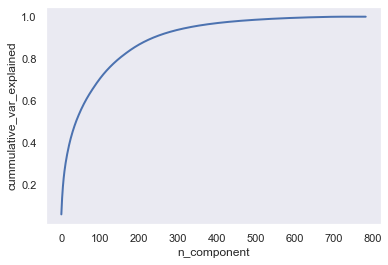

In [82]:
plt.figure(1,figsize=(6,4))
plt.clf()
plt.plot(cummulative_var_explained,linewidth=2)
plt.axis('tight')
plt.grid()
plt.xlabel('n_component')
plt.ylabel('cummulative_var_explained')
plt.show()

### get only 95% of information

In [83]:
pca = PCA(n_components=.95)

In [88]:
reduced_data = pca.fit_transform(data) # data standardized before
print(f'pca_data shape: {reduced_data.shape}')

pca_data shape: (70000, 332)


In [85]:
per_var_explained = pca.explained_variance_ / np.sum(pca.explained_variance_)
per_var_explained

array([0.05939509, 0.04253782, 0.03934895, 0.03045163, 0.02653336,
       0.02307871, 0.02014968, 0.01832239, 0.01612823, 0.01469517,
       0.01412769, 0.01264613, 0.01172553, 0.01147943, 0.01082055,
       0.01047286, 0.00980237, 0.00968005, 0.00935338, 0.00908597,
       0.00864963, 0.00840411, 0.00802682, 0.00781359, 0.00754259,
       0.0072557 , 0.00717239, 0.00689017, 0.00660287, 0.00642448,
       0.00628675, 0.006203  , 0.005972  , 0.00588778, 0.00581532,
       0.00562554, 0.00555343, 0.00542973, 0.00532086, 0.0050255 ,
       0.00501365, 0.00489621, 0.00477305, 0.00469203, 0.00465577,
       0.00460908, 0.00460294, 0.00450221, 0.00447152, 0.00440537,
       0.00425312, 0.004171  , 0.00413855, 0.00411104, 0.00406769,
       0.00397356, 0.00393548, 0.00387701, 0.00379332, 0.00375114,
       0.0036766 , 0.00362649, 0.00361292, 0.00358935, 0.00352055,
       0.00349575, 0.0034715 , 0.00336234, 0.00333789, 0.00332022,
       0.00326243, 0.00321865, 0.00321142, 0.00319948, 0.00312

In [86]:
cummulative_var_explained = np.cumsum(per_var_explained)
cummulative_var_explained

array([0.05939509, 0.10193292, 0.14128187, 0.1717335 , 0.19826686,
       0.22134556, 0.24149524, 0.25981762, 0.27594585, 0.29064102,
       0.30476871, 0.31741484, 0.32914037, 0.3406198 , 0.35144034,
       0.36191321, 0.37171558, 0.38139562, 0.390749  , 0.39983497,
       0.40848459, 0.4168887 , 0.42491552, 0.43272911, 0.4402717 ,
       0.4475274 , 0.45469979, 0.46158996, 0.46819283, 0.47461731,
       0.48090406, 0.48710705, 0.49307905, 0.49896683, 0.50478215,
       0.51040768, 0.51596112, 0.52139084, 0.5267117 , 0.5317372 ,
       0.53675084, 0.54164705, 0.5464201 , 0.55111212, 0.55576789,
       0.56037697, 0.56497991, 0.56948212, 0.57395364, 0.57835901,
       0.58261213, 0.58678313, 0.59092168, 0.59503272, 0.59910042,
       0.60307398, 0.60700946, 0.61088647, 0.61467979, 0.61843092,
       0.62210753, 0.62573401, 0.62934693, 0.63293629, 0.63645684,
       0.63995259, 0.64342409, 0.64678643, 0.65012432, 0.65344454,
       0.65670697, 0.65992562, 0.66313705, 0.66633652, 0.66945

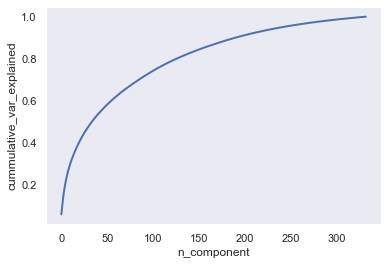

In [87]:
plt.figure(1,figsize=(6,4))
plt.clf()
plt.plot(cummulative_var_explained,linewidth=2)
plt.axis('tight')
plt.grid()
plt.xlabel('n_component')
plt.ylabel('cummulative_var_explained')
plt.show()

# To inverse back to the original form from pca 
* the object of the pca should be saved 

In [89]:
recoverd_data = pca.inverse_transform(reduced_data)
print(f'pca_data shape: {recoverd_data.shape}')

pca_data shape: (70000, 784)
